# Carregando dados necessários

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Lendo o dataframe

In [43]:
data = pd.read_csv('air_quality_health_impact_data.csv',index_col=0)
df = pd.DataFrame(data)

## Ver informações sobre o df

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5811 entries, 1 to 5811
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQI                  5811 non-null   float64
 1   PM10                 5811 non-null   float64
 2   PM2_5                5811 non-null   float64
 3   NO2                  5811 non-null   float64
 4   SO2                  5811 non-null   float64
 5   O3                   5811 non-null   float64
 6   Temperature          5811 non-null   float64
 7   Humidity             5811 non-null   float64
 8   WindSpeed            5811 non-null   float64
 9   RespiratoryCases     5811 non-null   int64  
 10  CardiovascularCases  5811 non-null   int64  
 11  HospitalAdmissions   5811 non-null   int64  
 12  HealthImpactScore    5811 non-null   float64
 13  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 681.0 KB


O método `df.info()` fornece um resumo conciso do DataFrame.
O dataframe possui 5811 entradas e 14 colunas, todas com valores não nulos. As colunas incluem 11 do tipo float64 e 3 do tipo int64, utilizando um total de 681.0 KB de memória.
Podemos 'dividir' as colunas do df em medidas de ar e características de saúde, respectivamente: "AQI, PM10, PM2_5, NO2, SO2, O3, Temperature, Humidity, WindSpeed" e "RespiratoryCases, CardiovascularCases, HospitalAdmissions, HealthImpactScore, HealthImpactClass"

In [45]:
df.describe()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


O método `df.describe()` fornece um resumo estatístico das colunas numéricas do DataFrame. Abaixo estão as informações obtidas para cada coluna:

- AQI, PM10, NO2, O3: O desvio padrão é relativamente alto, indicando uma grande variabilidade nos dados.
- WindSpeed: O desvio padrão é relativamente baixo, indicando menor variabilidade.

- RespiratoryCases, CardiovascularCases, HospitalAdmissions, HealthImpactScore, HealthImpactClass: O desvio padrão é relativamente baixo, indicando menor variabilidade.
- HealthImpactScore: O segundo quartil e o terceiro quartil tem valores iguais, indicando que a coluna tem muitos valores repetidos.

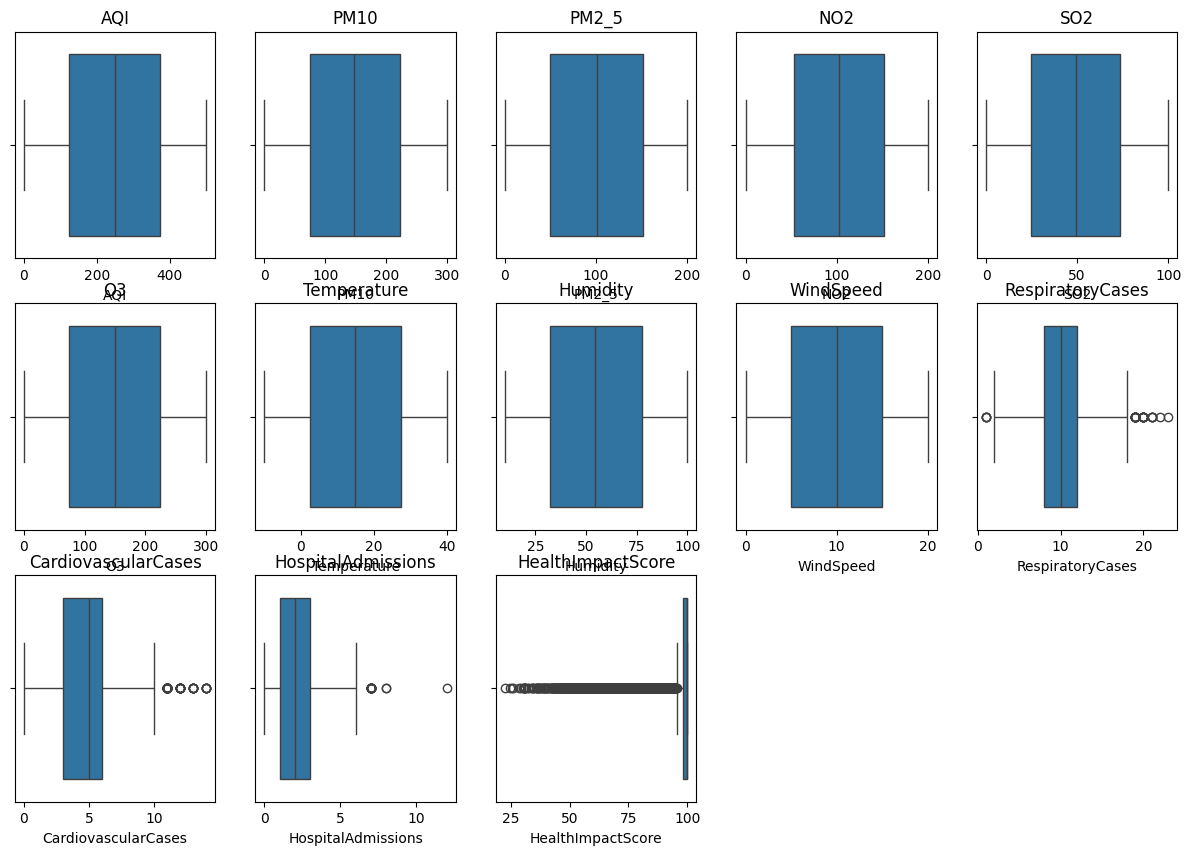

In [63]:
#criar boxplots para cada coluna para entender a distribuição dos dados
plt.figure(figsize = (15,10))
for i in enumerate(df.columns[0:13]):
        plt.subplot(3,5,i[0]+1)
        sns.boxplot(df[i[1]],orient = 'h')
        plt.title(f'{df.columns[i[0]]}')

A maioria das variáveis tem uma distribuição ampla, indicando variabilidade significativa nos dados.
As medianas de muitas variáveis estão em torno do ponto médio de suas respectivas escalas.
As variáveis relacionadas a casos de saúde (CardiovascularCases, HospitalAdmissions, HealthImpactScore) apresentam outliers significativos, sugerindo que há casos extremos que podem estar influenciando a análise.
A dispersão dos dados é bem distribuída na maioria dos casos, sugerindo que as variáveis têm uma distribuição relativamente normal, exceto pelos outliers (muitos em HealthImpactScore).

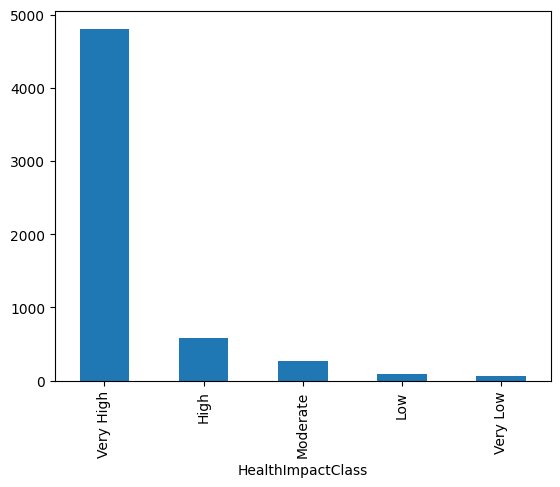

In [ ]:
# Conta a frequência de cada valor na coluna 'HealthImpactClass'
value_counts = df['HealthImpactClass'].value_counts()

value_counts.plot(kind='bar')
plt.show()

In [46]:
df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
RecordID,,,,,,,,,,,,,,
1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


## Entender possíveis correlações entre colunas

In [47]:
corr = df.drop(["HealthImpactClass"], axis='columns').corr()

# Remove as correlações de uma coluna com ela mesma, definindo-as como NaN
for i in range(len(corr.columns)):
    corr.iloc[i, i] = float('nan')

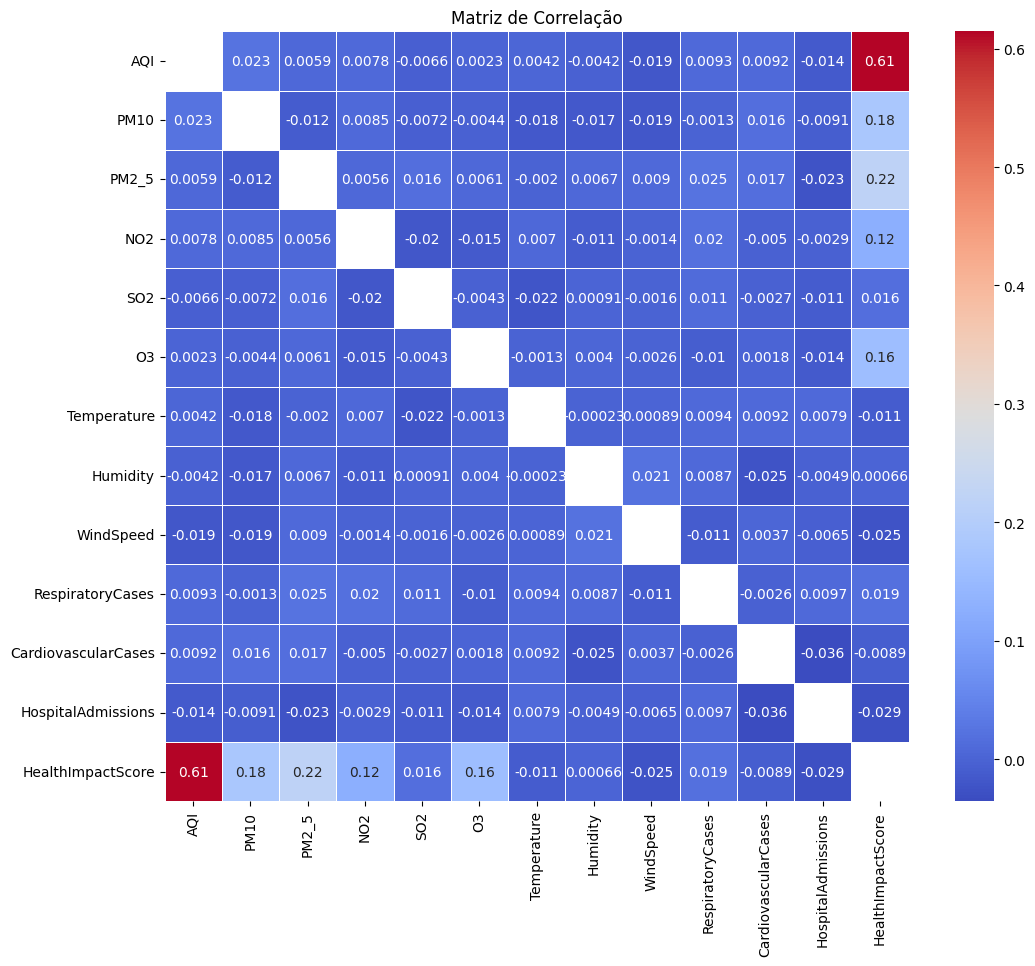

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

Como o heatmap está visivelmente azul (indicando baixa correlação entre as colunas), iremos calcular alguams métricas para entender melhor o df.

In [49]:
# Calculando os valores absolutos das correlações desconsiderando valores NaN
correlations = corr.values.flatten()
abs_correlations = np.abs(correlations[~np.isnan(correlations)])

mean_abs_corr = np.mean(abs_correlations)
median_abs_corr = np.median(abs_correlations)
max_abs_corr = np.max(abs_correlations)
min_abs_corr = np.min(abs_correlations)

In [50]:
print(f"Média das correlações: {mean_abs_corr}")
print(f"Mediana das correlações: {median_abs_corr}")
print(f"\nMaior correlação: {max_abs_corr}")
print(f"Menor correlação: {min_abs_corr}")

Média das correlações: 0.026446764420489693
Mediana das correlações: 0.009203472145175919

Maior correlação: 0.6145597341195581
Menor correlação: 0.00023278032247807463


- Média das correlações: A média das correlações absolutas é relativamente baixa, indicando que, em geral, as variáveis do DataFrame não têm fortes relações lineares entre si.
- Mediana das correlações: A mediana das correlações absolutas é ainda menor que a média, sugerindo que a maioria das correlações entre as variáveis é muito fraca ou inexistente.
- Maior correlação A maior correlação encontrada é 0.6146, que é uma correlação moderada a forte. Isso indica que há pelo menos um par de variáveis no DataFrame que têm uma relação linear significativa. No contexto dos dados, isso pode sugerir que essas variáveis estão fortemente relacionadas e podem influenciar uma à outra.
- Menor correlação: A menor correlação encontrada é 0.0002, que é praticamente zero. Isso indica que há pares de variáveis no DataFrame que não têm nenhuma relação linear entre si.

In [51]:
limite = 0.2        # Limite para considerar uma correlação
pares_correlacionados = []

correlacao_forte = 0
total = 0

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        total += 1
        if corr.iloc[i, j] > limite or corr.iloc[i, j] < -limite:
            correlacao_forte += 1
            pares_correlacionados.append((corr.columns[i], corr.columns[j]))

# Exibe a quantidade de correlações fortes
print(f"Total de correlações: {total}\nQuantidade de correlações acima de {limite} ou abaixo de {-limite}: {correlacao_forte}\nColunas com corelações fortes: {pares_correlacionados}")

Total de correlações: 169
Quantidade de correlações acima de 0.2 ou abaixo de -0.2: 4
Colunas com corelações fortes: [('AQI', 'HealthImpactScore'), ('PM2_5', 'HealthImpactScore'), ('HealthImpactScore', 'AQI'), ('HealthImpactScore', 'PM2_5')]


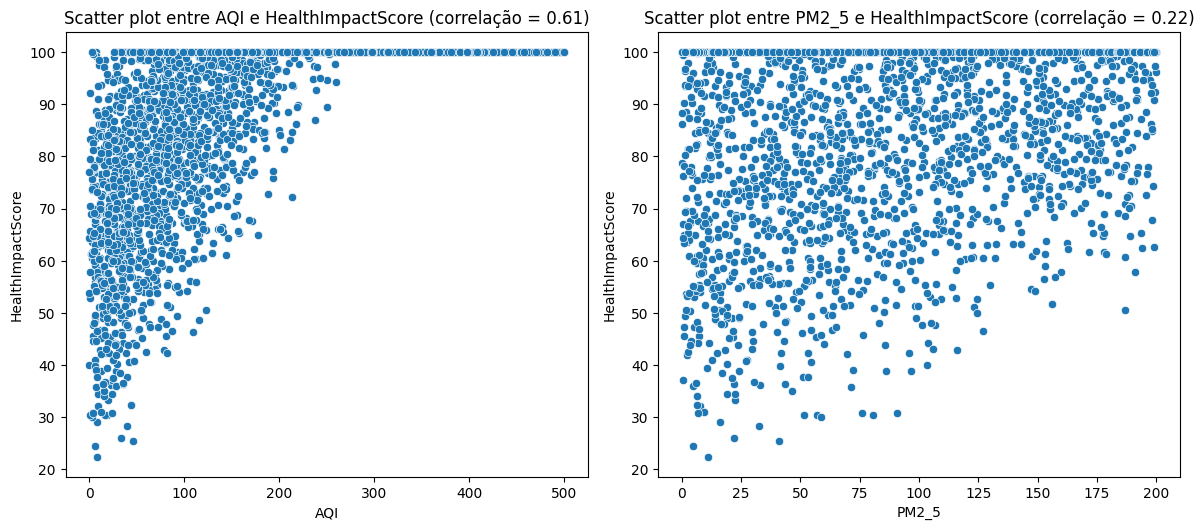

In [52]:
# Plota gráficos scatter para os pares de colunas com correlação forte ('AQI', 'HealthImpactScore') e ('PM2_5', 'HealthImpactScore')
fig = plt.figure(figsize=(12, 10))
c = 1
pares_correlacionados=pares_correlacionados[:2]
for col1, col2 in pares_correlacionados:
    axis = fig.add_subplot(2, 2, c)
    sns.scatterplot(x=df[col1], y=df[col2])
    axis.set_title(f'Scatter plot entre {col1} e {col2} (correlação = {corr.loc[col1, col2]:.2f})')
    axis.set_xlabel(col1)
    axis.set_ylabel(col2)
    c += 1

plt.tight_layout()
plt.show()


Os gráficos mostram relações entre o HealthImpactScore e dois diferentes índices de qualidade do ar (PM2_5 e AQI). A relação entre HealthImpactScore e AQI é mais forte (0.61) comparada com a relação entre HealthImpactScore e PM2_5 (0.22), sugerindo que o AQI pode ser um melhor indicador do impacto na saúde neste conjunto de dados. Em ambos os casos, há uma concentração significativa de valores altos de HealthImpactScore, indicando que a saúde pode estar sendo fortemente impactada por outros fatores além do AQI e PM2_5.

## Mudar valores da coluna HealthImpactClass

0: 'Very High' (HealthImpactScore >= 80)
1: 'High' (60 <= HealthImpactScore < 80)
2: 'Moderate' (40 <= HealthImpactScore < 60)
3: 'Low' (20 <= HealthImpactScore < 40)
4: 'Very Low' (HealthImpactScore < 20)

In [54]:
def change_value(value):
    if value==0:
        return 'Very High'
    elif value==1:
        return 'High'
    elif value==2:
        return 'Moderate'
    elif value==3:
        return 'Low'
    else :
        return 'Very Low'
df['HealthImpactClass'] = df['HealthImpactClass'].apply(change_value)
df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
RecordID,,,,,,,,,,,,,,
1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,Very High
2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,Very High
3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,Very High
4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,Very High
5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,Very High


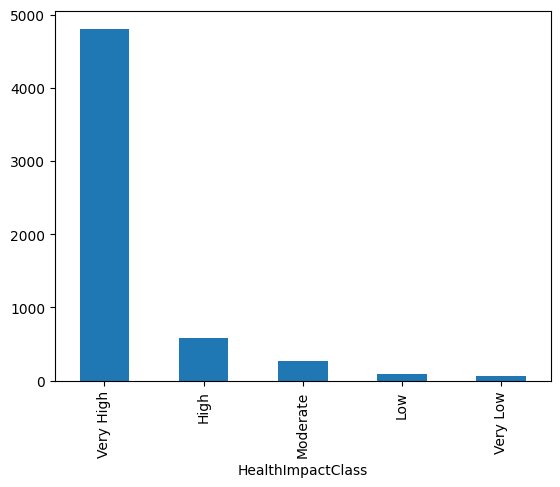

In [61]:
# Conta a frequência de cada valor na coluna 'HealthImpactClass'
value_counts = df['HealthImpactClass'].value_counts()

value_counts.plot(kind='bar')
plt.show()

Essa distribuição mostra que a maioria dos dados está na categoria "Very High", indicando que a maior parte dos registros tem um impacto muito alto na saúde. As categorias "High" e "Moderate" têm significativamente menos ocorrências, e as categorias "Low" e "Very Low" têm o menor número de ocorrências.